____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Analisis exploratorio de datos EPH (2019)__<br/>
__Elaborado por: Santiago Chas__
____

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

In [1]:
pwd

'C:\\Users\\User 1\\Desktop\\Santi Documentos\\Facultad UTN\\5° Año\\Ciencia de datos\\edh\\Entrega Final'

In [2]:
ls

 Volume in drive C is TI106166W0D
 Volume Serial Number is 92EF-5B6E

 Directory of C:\Users\User 1\Desktop\Santi Documentos\Facultad UTN\5° Año\Ciencia de datos\edh\Entrega Final

19/11/2019  12:29 a.m.    <DIR>          .
19/11/2019  12:29 a.m.    <DIR>          ..
19/11/2019  12:29 a.m.    <DIR>          .ipynb_checkpoints
18/11/2019  10:50 p.m.           310,886 clusterai_chas_reporte.pdf
18/11/2019  10:49 p.m.           273,815 clusterai_santiago_chas_eda.ipynb
19/11/2019  12:29 a.m.            80,157 clusterai_santiago_chas_machine_learning.ipynb
               3 File(s)        664,858 bytes
               3 Dir(s)  358,559,567,872 bytes free


In [6]:
edh = pd.read_csv(r'C:\Users\User 1\Desktop\Santi Documentos\Facultad UTN\5° Año\Ciencia de datos\edh\Entrega Final\usu_individual_t119.csv', delimiter=';', parse_dates = True)

C:\Users\nicolas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,95,100,102,105,134,136,139,143,145,148,150,154,155,158,176) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
edh_clean=edh.iloc[:,[6,11,13,14,15,16,17,22, 26,27,28,29,141,162,169,177]]

In [8]:
edh_clean.shape

(59369, 16)

In [9]:
edh_clean.rename(columns={"CH04":"Sexo","CH06":"Edad","CH07":"Estado_Civil","CH08":"Tipo_de_Cobertura","CH09":"Sabe_leer_y_escribir?", "CH10":"Estudia?","NIVEL_ED":"Nivel_Educativo","CH15":"Nacionalidad","Estado":"Condición_Laboral","CAT_OCUP":"Categoria_Ocupacional","CAT_INAC":"Categoria_Inactividad", "P47T":"Monto_Ingreso_Individual", "ITF":"Monto_Ingreso_Familiar", "IPCF":"Monto_Ingreso_Per_Capita", "NHH":"Habitantes_Hogar"}, inplace=True)
edh_clean.head()

C:\Users\nicolas\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar
0,41,2,28,1,4,1,2,1,4,3,0,4,2000.0,7000,1750,4
1,41,2,13,5,4,1,1,1,3,3,0,3,0.0,7000,1750,4
2,41,1,1,5,4,3,0,1,7,4,0,5,0.0,7000,1750,4
3,41,2,41,5,4,1,2,1,5,1,3,0,6200.0,6200,3100,2
4,41,2,9,5,4,1,1,1,1,4,0,3,0.0,6200,3100,2


In [10]:
edh_clean["Monto_Ingreso_Familiar"].describe()

count    5.936900e+04
mean     3.235771e+04
std      3.591157e+04
min      0.000000e+00
25%      1.000000e+04
50%      2.580000e+04
75%      4.500000e+04
max      2.013299e+06
Name: Monto_Ingreso_Familiar, dtype: float64

In [11]:
edh_clean.describe()

,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar
count,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,5.925800e+04,5.936900e+04,5.936900e+04,59369.000000
mean,34.886759,1.516549,34.724621,3.496303,2.193990,1.116172,1.671327,1.433240,3.716199,2.283060,1.196348,1.685661,1.052400e+04,3.235771e+04,9.750320e+03,3.308494
std,15.627859,0.499730,22.338798,1.642767,2.008844,0.389825,0.570723,0.864445,1.821816,1.147375,1.397464,1.903531,2.102426e+04,3.591157e+04,1.312682e+04,2.489301
min,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,40.000000,1.000000,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000e+04,2.500000e+03,1.000000
50%,42.000000,2.000000,32.000000,5.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.000000,0.000000,1.000000,2.000000e+03,2.580000e+04,6.900000e+03,3.000000
75%,43.000000,2.000000,51.000000,5.000000,4.000000,1.000000,2.000000,1.000000,5.000000,3.000000,3.000000,3.000000,1.550000e+04,4.500000e+04,1.300000e+04,5.000000
max,44.000000,2.000000,103.000000,9.000000,123.000000,3.000000,3.000000,9.000000,7.000000,4.000000,9.000000,7.000000,2.003999e+06,2.013299e+06,1.006650e+06,20.000000


In [12]:
edh_clean['Sexo'] = edh_clean['Sexo'].map({1 : 'Hombre' ,2 : 'Mujer'})
edh_clean['Nacionalidad'] = edh_clean['Nacionalidad'].map({1 : 'Argentino' ,2 : 'Argentino',3:'Argentino',4: 'Extranjero',5 : 'Extranjero'})
edh_clean['REGION'] = edh_clean['REGION'].map({1 : 'Gran Buenos Aires' ,40 : 'Noroeste',41:'Nordeste',42: 'Cuyo',43 : 'Pampeana',44:"Patagónica"})
edh_clean['Estado_Civil'] = edh_clean['Estado_Civil'].map({1 : 'Unido' ,2 : 'Casado',3:'Separado',4: 'Viudo',5 : 'Soltero'})
edh_clean['Tipo_de_Cobertura'] = edh_clean['Tipo_de_Cobertura'].map({1 : 'Obra Social' ,2 : 'Mutual/Prepaga',3:'Planes y seguros publicos',4: 'No',12 : 'Servicio de Emergencia'})
edh_clean['Sabe_leer_y_escribir?'] = edh_clean['Sabe_leer_y_escribir?'].map({1 : 'Si' ,2 : 'No',3:'Menor de 3 años'})
edh_clean['Estudia?'] = edh_clean['Estudia?'].map({1 : 'Si, asiste' ,2 : 'No, pero asistio',3:'Nunca asistio'})
edh_clean['Nivel_Educativo'] = edh_clean['Nivel_Educativo'].map({1 : 'Primaria Incompleta' ,2 : 'Primaria Completa', 3:'Secundario Incompleta', 4: 'Secundario Completa',5: 'Universidad Incompleta',6: 'Universidad Completa', 7: 'Sin Instruccion'})
edh_clean['ESTADO'] = edh_clean['ESTADO'].map({1 : 'Ocupado' ,2 : 'Desocupado',3:'Inactivo',4:'Menor 10 años'})
edh_clean['Categoria_Ocupacional'] = edh_clean['Categoria_Ocupacional'].map({0 : 'Desocupado' ,1 : 'Patron' ,2 : 'Cuenta Propia',3:'Obrebro/Empleado',4:'Trabajador familiar sin remuneracion'})
edh_clean['Categoria_Inactividad'] = edh_clean['Categoria_Inactividad'].map({0 : 'Ocupado',1 : 'Jubilado/Pensionado' ,2 : 'Rentista',3:'Estudiante',4:'Ama de Casa', 5:'Menor de 6 años', 6:'Discapacitado', 7:'Otros'})

C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [13]:
edh_clean.head()

,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar
0,Nordeste,Mujer,28,Unido,No,Si,"No, pero asistio",Argentino,Secundario Completa,Inactivo,Desocupado,Ama de Casa,2000.0,7000,1750,4
1,Nordeste,Mujer,13,Soltero,No,Si,"Si, asiste",Argentino,Secundario Incompleta,Inactivo,Desocupado,Estudiante,0.0,7000,1750,4
2,Nordeste,Hombre,1,Soltero,No,Menor de 3 años,NaN,Argentino,Sin Instruccion,Menor 10 años,Desocupado,Menor de 6 años,0.0,7000,1750,4
3,Nordeste,Mujer,41,Soltero,No,Si,"No, pero asistio",Argentino,Universidad Incompleta,Ocupado,Obrebro/Empleado,Ocupado,6200.0,6200,3100,2
4,Nordeste,Mujer,9,Soltero,No,Si,"Si, asiste",Argentino,Primaria Incompleta,Menor 10 años,Desocupado,Estudiante,0.0,6200,3100,2


In [14]:
edh_clean.isnull().any()

REGION                      False
Sexo                        False
Edad                        False
Estado_Civil                 True
Tipo_de_Cobertura            True
Sabe_leer_y_escribir?       False
Estudia?                     True
Nacionalidad                 True
Nivel_Educativo             False
ESTADO                       True
Categoria_Ocupacional        True
Categoria_Inactividad       False
Monto_Ingreso_Individual     True
Monto_Ingreso_Familiar      False
Monto_Ingreso_Per_Capita    False
Habitantes_Hogar            False
dtype: bool

In [15]:
edh_clean.isnull().sum()

REGION                         0
Sexo                           0
Edad                           0
Estado_Civil                   1
Tipo_de_Cobertura             76
Sabe_leer_y_escribir?          0
Estudia?                    1463
Nacionalidad                   8
Nivel_Educativo                0
ESTADO                       111
Categoria_Ocupacional          2
Categoria_Inactividad          0
Monto_Ingreso_Individual     111
Monto_Ingreso_Familiar         0
Monto_Ingreso_Per_Capita       0
Habitantes_Hogar               0
dtype: int64

In [16]:
total = edh_clean.isnull().sum().sort_values(ascending = False)
percent = (edh_clean.isnull().sum()/edh_clean.count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Estudia?,1463,0.025265
Monto_Ingreso_Individual,111,0.001873
ESTADO,111,0.001873
Tipo_de_Cobertura,76,0.001282
Nacionalidad,8,0.000135
Categoria_Ocupacional,2,0.000034


In [17]:
edh_clean.dropna(how ='any', inplace = True)

C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
edh_clean.shape

(57713, 16)

In [19]:
edh_clean = edh_clean[edh_clean.Monto_Ingreso_Familiar != 0]

In [20]:
edh_clean.shape

(46501, 16)

In [21]:
edh_clean.Nivel_Educativo.unique()

array(['Secundario Completa', 'Secundario Incompleta',
       'Universidad Incompleta', 'Primaria Incompleta',
       'Universidad Completa', 'Sin Instruccion', 'Primaria Completa'],
      dtype=object)

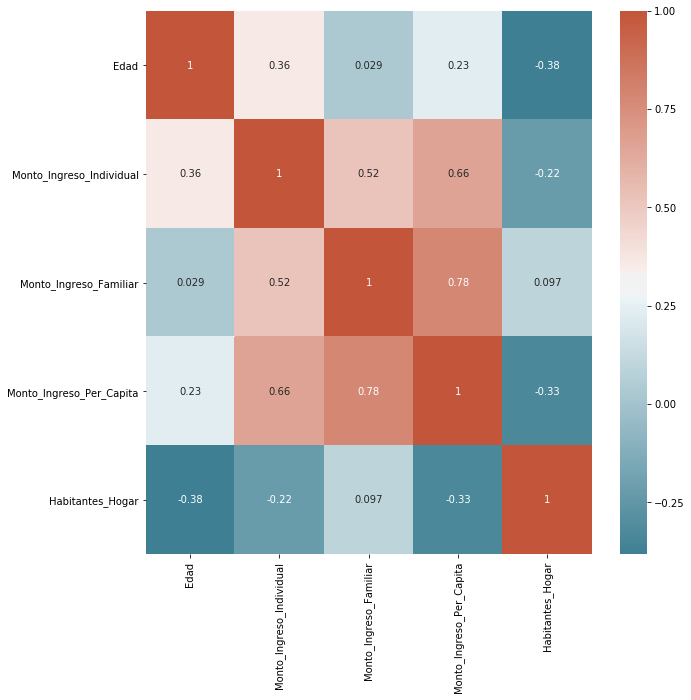

In [22]:
corrmat = edh_clean.corr()
#f, ax = plt.subplots()
plt.figure(figsize=(10,10))
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

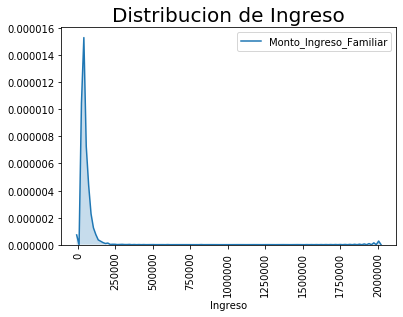

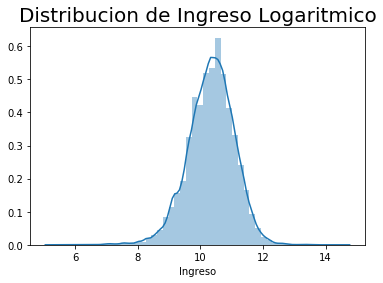

In [23]:
edh_clean["Log_Monto_Ingreso_Individual"] = np.log(1+edh_clean.Monto_Ingreso_Familiar)


#Plot Precio
sns.kdeplot(edh_clean.Monto_Ingreso_Familiar, shade = True)
plt.xlabel("Ingreso")
plt.xticks(rotation=90)
plt.title('Distribucion de Ingreso',size = 20)
plt.show()

#Plot Log-Precio
sns.distplot(edh_clean.Log_Monto_Ingreso_Individual)
plt.title('Distribucion de Ingreso Logaritmico',size = 20)
plt.xlabel("Ingreso")
plt.show()

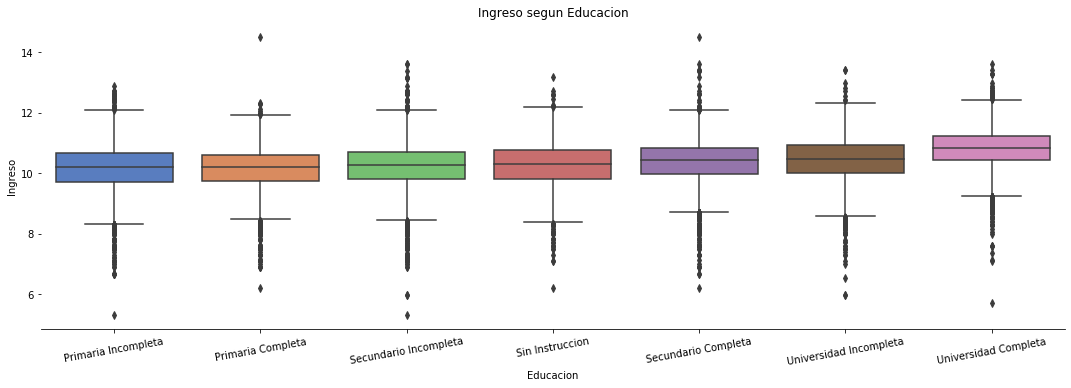

In [24]:
g = sns.catplot(y = "Log_Monto_Ingreso_Individual", x ="Nivel_Educativo" , data= edh_clean, kind="box", height = 5,aspect=3 ,palette = "muted", order = ["Primaria Incompleta", "Primaria Completa", "Secundario Incompleta", "Sin Instruccion", "Secundario Completa", "Universidad Incompleta", "Universidad Completa"])
g.despine(left=True)
g.set_xticklabels(rotation=10)
plt.xlabel("Educacion")
plt.ylabel("Ingreso")
plt.title('Ingreso segun Educacion',size = 12)
plt.show()

In [25]:
edh_clean.loc[(edh_clean['Edad'] > 0) & (edh_clean['Edad'] <= 18), 'Age_Band'] = "<18"
edh_clean.loc[(edh_clean['Edad'] > 18) & (edh_clean['Edad'] <= 25), 'Age_Band']   = "18-25"
edh_clean.loc[(edh_clean['Edad'] > 25) & (edh_clean['Edad'] <= 40), 'Age_Band']   = "25-40"
edh_clean.loc[(edh_clean['Edad'] > 40) & (edh_clean['Edad'] <= 60), 'Age_Band']   = "40-60"
edh_clean.loc[(edh_clean['Edad'] > 60, 'Age_Band')] = ">60"

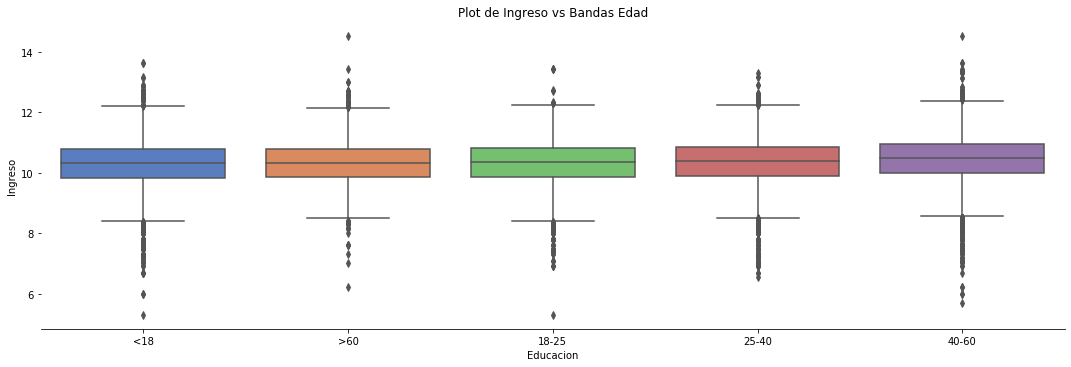

In [26]:
g = sns.catplot(y = "Log_Monto_Ingreso_Individual", x ="Age_Band" , data= edh_clean, kind="box", height = 5,aspect=3 ,palette = "muted", order = ["<18", ">60", "18-25", "25-40", "40-60"])
g.despine(left=True)
plt.xlabel("Educacion")
plt.ylabel("Ingreso")
plt.title('Plot de Ingreso vs Bandas Edad',size = 12)
plt.show()

In [27]:
edh_clean.loc[(edh_clean['Monto_Ingreso_Familiar'] > 0) & (edh_clean['Monto_Ingreso_Familiar'] <= 20000), 'Clase_Social'] = "D2/E"
edh_clean.loc[(edh_clean['Monto_Ingreso_Familiar'] > 20000) & (edh_clean['Monto_Ingreso_Familiar'] <= 30000), 'Clase_Social']   = "D1"
edh_clean.loc[(edh_clean['Monto_Ingreso_Familiar'] > 30000) & (edh_clean['Monto_Ingreso_Familiar'] <= 50000), 'Clase_Social']   = "C3"
edh_clean.loc[(edh_clean['Monto_Ingreso_Familiar'] > 50000) & (edh_clean['Monto_Ingreso_Familiar'] <= 130000), 'Clase_Social']   = "C2"
edh_clean.loc[(edh_clean['Monto_Ingreso_Familiar'] > 130000, 'Clase_Social')] = "ABC1"

In [28]:
edh_clean["Persona"] = (1)

In [29]:
Monto_Individual_Agr = pd.pivot_table(edh_clean,values = ['Persona'], columns =  edh_clean.Clase_Social ,index = [edh_clean.REGION] , aggfunc = np.sum)
Monto_Individual_Agr

Persona                        
Clase_Social         ABC1    C2    C3    D1  D2/E
REGION                                           
Cuyo                   60  1136  1530  1023  1263
Gran Buenos Aires     191  1686  1705  1212  1711
Nordeste               48   786  1113  1090  1837
Noroeste              136  2385  3068  2598  2863
Pampeana              209  2931  3564  2632  3783
Patagónica            149  2029  1857   909   997

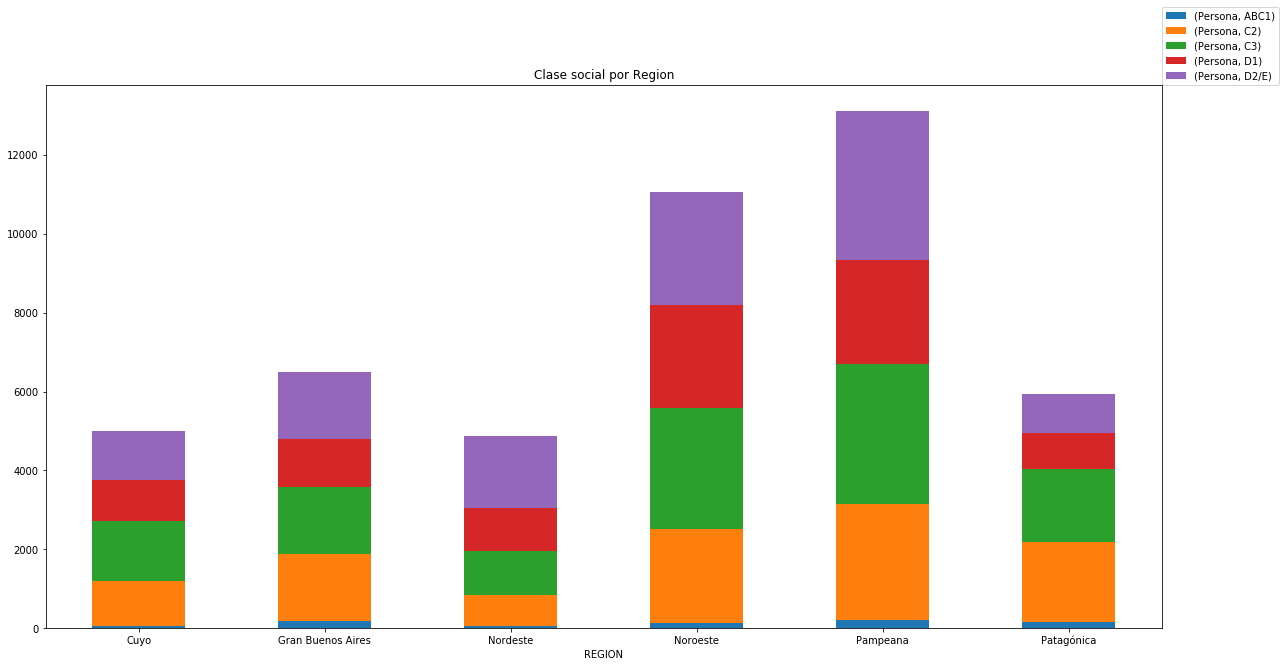

In [30]:
Monto_Individual_Agr.plot(kind='bar', figsize = (20,10), stacked = True)
plt.title("Clase social por Region")
plt.xticks(rotation=0)
plt.legend(loc = (1,1))
plt.show()

In [31]:
edh_clean.head()

,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar,Log_Monto_Ingreso_Individual,Age_Band,Clase_Social,Persona
0,Nordeste,Mujer,28,Unido,No,Si,"No, pero asistio",Argentino,Secundario Completa,Inactivo,Desocupado,Ama de Casa,2000.0,7000,1750,4,8.853808,25-40,D2/E,1
1,Nordeste,Mujer,13,Soltero,No,Si,"Si, asiste",Argentino,Secundario Incompleta,Inactivo,Desocupado,Estudiante,0.0,7000,1750,4,8.853808,<18,D2/E,1
3,Nordeste,Mujer,41,Soltero,No,Si,"No, pero asistio",Argentino,Universidad Incompleta,Ocupado,Obrebro/Empleado,Ocupado,6200.0,6200,3100,2,8.732466,40-60,D2/E,1
4,Nordeste,Mujer,9,Soltero,No,Si,"Si, asiste",Argentino,Primaria Incompleta,Menor 10 años,Desocupado,Estudiante,0.0,6200,3100,2,8.732466,<18,D2/E,1
5,Nordeste,Hombre,51,Separado,No,Si,"No, pero asistio",Argentino,Primaria Incompleta,Ocupado,Cuenta Propia,Ocupado,8000.0,8000,8000,1,8.987322,40-60,D2/E,1


In [32]:
Cant_Hab = pd.pivot_table(edh_clean,values = ['Persona'], columns =  edh_clean.Clase_Social ,index = [edh_clean.Nivel_Educativo] , aggfunc = np.sum)
Cant_Hab

Persona                        
Clase_Social              ABC1    C2    C3    D1  D2/E
Nivel_Educativo                                       
Primaria Completa           22   949  1599  1468  2104
Primaria Incompleta         91  1263  1816  1591  2443
Secundario Completa        108  2200  2813  1913  2126
Secundario Incompleta       86  1907  2755  2226  3135
Sin Instruccion             45   593   814   613   925
Universidad Completa       326  2455  1531   682   510
Universidad Incompleta     115  1586  1509   971  1211

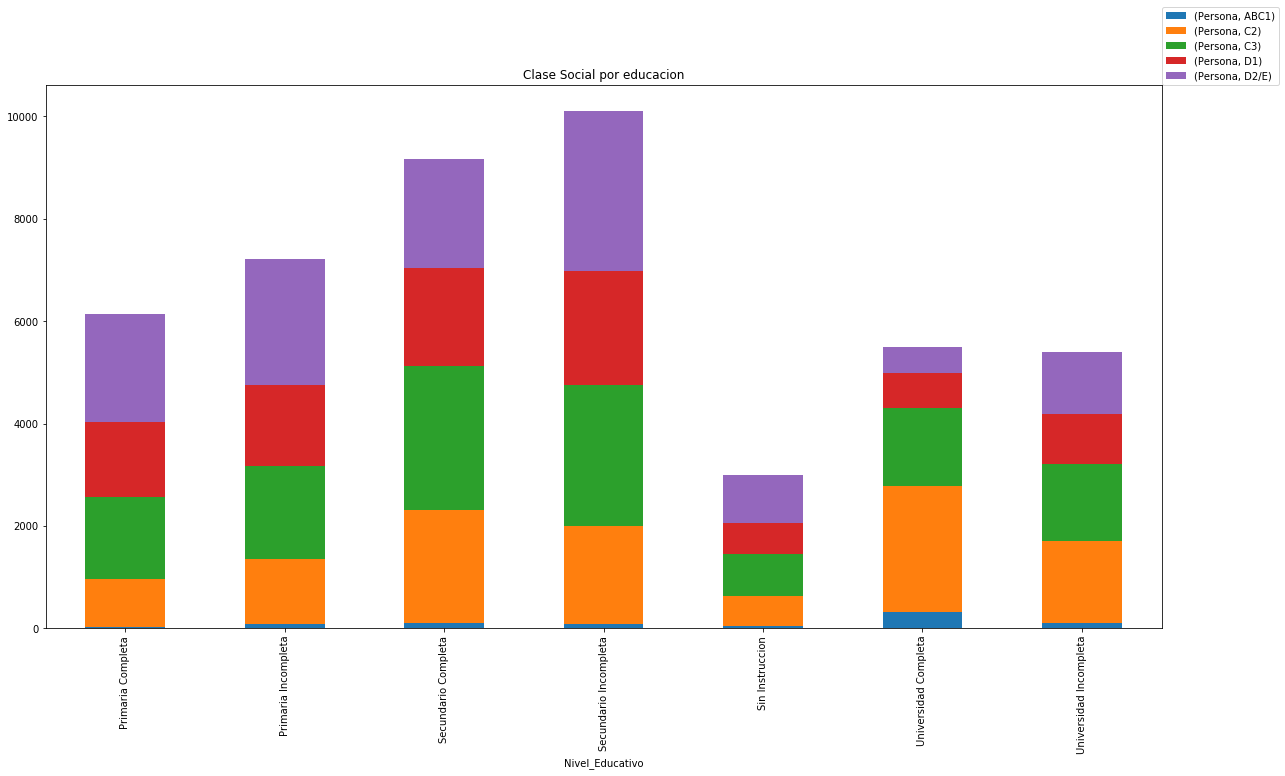

In [33]:
Cant_Hab.plot(kind='bar', figsize = (20,10), stacked = True)
plt.title("Clase Social por educacion")
plt.legend(loc = (1,1))
plt.show()